# Домашнее задание
## Система рекомендаций Аниме

![Схема](./anime-sch.png)

In [1]:
import sys
sys.path.append('/Users/snipghost/anaconda3/bin/')
print(sys.version)

3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
# Download personal anime list
!wget -O my_anime.xml https://shikimori.one/snipghost/list_export/animes.xml

--2021-06-18 15:07:56--  https://shikimori.one/snipghost/list_export/animes.xml
Распознаётся shikimori.one (shikimori.one)… 135.181.210.175
Подключение к shikimori.one (shikimori.one)|135.181.210.175|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: нет данных [application/xml]
Сохранение в: «my_anime.xml»

my_anime.xml            [ <=>                ] 302,88K  --.-KB/s    за 0,09s   

2021-06-18 15:07:56 (3,14 MB/s) - «my_anime.xml» сохранён [310146]



In [3]:
# Download anime recommendations database
!kaggle datasets download --force CooperUnion/anime-recommendations-database -f anime.csv

100%|████████████████████████████████████████| 915k/915k [00:00<00:00, 4.79MB/s]
100%|████████████████████████████████████████| 915k/915k [00:00<00:00, 4.78MB/s]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sns
%matplotlib inline  

In [5]:
df = pd.read_csv('anime.csv')
print(df.shape)
df.head()

(12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Anime.csv

    anime_id - myanimelist.net's unique id identifying an anime.
    name - full name of anime.
    genre - comma separated list of genres for this anime.
    type - movie, TV, OVA, etc.
    episodes - how many episodes in this show. (1 if movie).
    rating - average rating out of 10 for this anime.
    members - number of community members that are in this anime's "group".


In [6]:
df1 = df[df.isna().any(axis=1)]
df1.shape

(277, 7)

In [7]:
print(df.shape)
df = df.dropna()
print(df.shape)
df.reset_index(drop=True, inplace=True)
df.head()

(12294, 7)
(12017, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    for col in col_list:
        sns.distplot(df1[col], ax=ax1)
    # второй график
    ax2.set_title(label2)
    for col in col_list:
        sns.distplot(df2[col], ax=ax2)
    plt.show()
    
def draw_data(col_list, df, df_scaled):
    df[col_list].plot()
    df_scaled[col_list].plot()
    plt.show()
    
def get_scaled(df, columns, scaler=StandardScaler()):
    data_scaled = scaler.fit_transform(df[columns])
    df_scaled = pd.DataFrame(data_scaled, columns=columns)
    draw_data(columns, df, df_scaled)
    draw_kde(columns, df, df_scaled, 'Before', 'After')
    return df_scaled

def apply_scaled(df, df_scaled, columns):
    for col in columns:
        df[f'{col}_scaled'] = df_scaled[col]
    return df

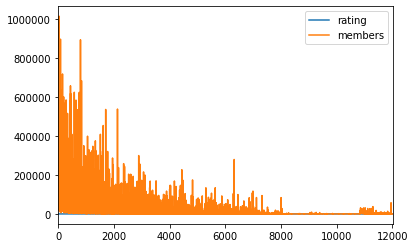

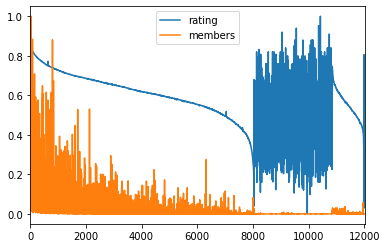

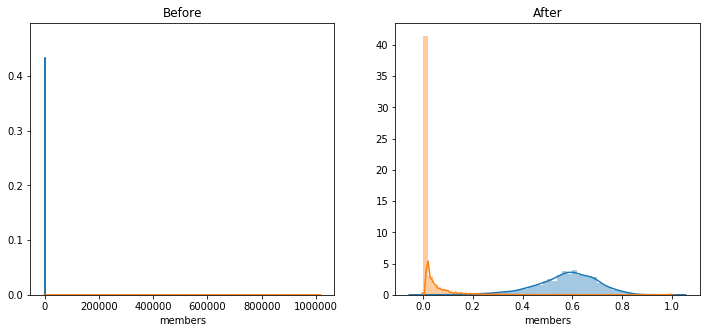

,anime_id,name,genre,type,episodes,rating,members,rating_scaled,members_scaled
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0.924370,0.197867
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0.911164,0.782769
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0.909964,0.112683
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0.900360,0.664323
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0.899160,0.149180


In [9]:
df_scaled_maxmin = get_scaled(df, ['rating', 'members'], MinMaxScaler())
df = apply_scaled(df, df_scaled_maxmin, ['rating', 'members'])
df.head()

In [10]:
def normalize(df, cols):
    x = df[cols]
    print(x.shape)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    print(x_scaled)
    print(x_scaled.shape)
    dataset = pd.DataFrame(x_scaled, columns = cols)
    print(dataset.shape)
    print(dataset.tail())
#     origin_columns = df.columns
#     df = df.drop(columns=cols)
#     df = pd.concat([df, dataset], ignore_index=True, axis=1)
#     df.columns = origin_columns
    for col in cols:
        df[col] = dataset[col]
    return df

In [11]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df = df.fillna(df.mean())
df.head()

,anime_id,name,genre,type,episodes,rating,members,rating_scaled,members_scaled
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,0.924370,0.197867
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,0.911164,0.782769
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,0.909964,0.112683
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,0.900360,0.664323
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,0.899160,0.149180


In [12]:
df = normalize(df, ['rating', 'members', 'episodes'])
df.head()

(12017, 3)
[[9.24369748e-01 1.97866664e-01 0.00000000e+00]
 [9.11164466e-01 7.82768603e-01 3.46725371e-02]
 [9.09963986e-01 1.12683141e-01 2.75178866e-02]
 ...
 [3.85354142e-01 2.04161139e-04 1.65107320e-03]
 [3.97358944e-01 1.60764569e-04 0.00000000e+00]
 [4.54981993e-01 1.28217141e-04 0.00000000e+00]]
(12017, 3)
(12017, 3)
         rating   members  episodes
12012  0.297719  0.000196  0.000000
12013  0.313325  0.000169  0.000000
12014  0.385354  0.000204  0.001651
12015  0.397359  0.000161  0.000000
12016  0.454982  0.000128  0.000000


,anime_id,name,genre,type,episodes,rating,members,rating_scaled,members_scaled
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,0.000000,0.924370,0.197867,0.924370,0.197867
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,0.034673,0.911164,0.782769,0.911164,0.782769
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,0.027518,0.909964,0.112683,0.909964,0.112683
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,0.012658,0.900360,0.664323,0.900360,0.664323
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,0.027518,0.899160,0.149180,0.899160,0.149180


In [13]:
def one_hot_encoding(df, cols):
    for col, col_type in cols:
        if col_type == list:
            col_data = df[col].str.split(', ')
            mlb = MultiLabelBinarizer()
        else:
            col_data = df[col]
            mlb = LabelBinarizer()
        mlb_data = mlb.fit_transform(col_data)
        encoded_data = pd.DataFrame(mlb_data, columns=mlb.classes_, index=col_data.index)
        
        for cls in mlb.classes_:
            if cls in df.columns.values:
                df = df.rename(columns={cls: '{}_{}'.format(cls, col)})
        
        print('Changing column: {} to: {}'.format(col, mlb.classes_))
        df = df.drop(columns=[col])
        df = pd.concat([df, encoded_data], axis=1)
    return df

In [14]:
df = df.drop(columns=['type'])

In [15]:
# df = one_hot_encoding(df, [('type', str), ('genre', list)])
df = one_hot_encoding(df, [('genre', list)])
# df = df.drop(columns=['OVA'])
df.head()

Changing column: genre to: ['Action' 'Adventure' 'Cars' 'Comedy' 'Dementia' 'Demons' 'Drama' 'Ecchi'
 'Fantasy' 'Game' 'Harem' 'Hentai' 'Historical' 'Horror' 'Josei' 'Kids'
 'Magic' 'Martial Arts' 'Mecha' 'Military' 'Music' 'Mystery' 'Parody'
 'Police' 'Psychological' 'Romance' 'Samurai' 'School' 'Sci-Fi' 'Seinen'
 'Shoujo' 'Shoujo Ai' 'Shounen' 'Shounen Ai' 'Slice of Life' 'Space'
 'Sports' 'Super Power' 'Supernatural' 'Thriller' 'Vampire' 'Yaoi' 'Yuri']


,anime_id,name,episodes,rating,members,rating_scaled,members_scaled,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,0.000000,0.924370,0.197867,0.924370,0.197867,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,0.034673,0.911164,0.782769,0.911164,0.782769,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,0.027518,0.909964,0.112683,0.909964,0.112683,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,0.012658,0.900360,0.664323,0.900360,0.664323,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,0.027518,0.899160,0.149180,0.899160,0.149180,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
def plot_corr_matrix(df,size=15):
    corr = df.corr().abs()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.xticks(rotation=90)
    return corr

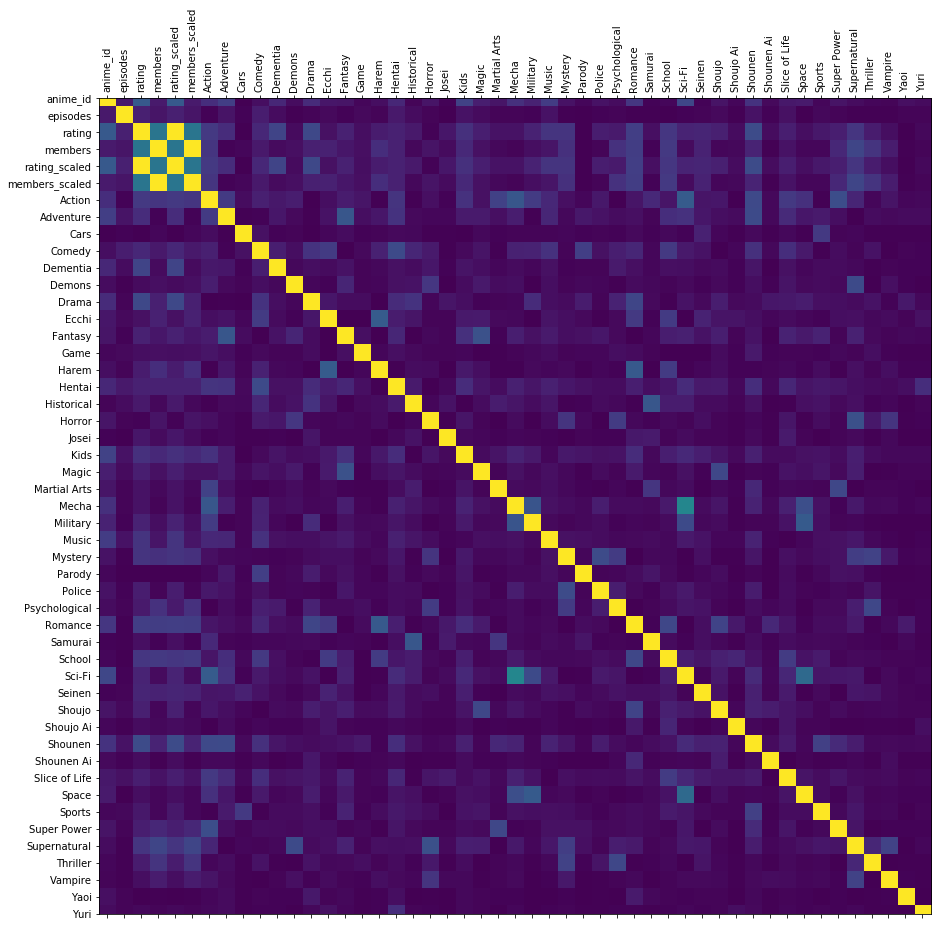

In [17]:
corr = plot_corr_matrix(df)

In [18]:
def drop_correlated(df, corr_matrix, threshold=0.5):
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
    df = df.drop(columns=to_drop)
    return df

In [19]:
df = drop_correlated(df, corr)
df.head()

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,0.000000,0.924370,0.197867,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,0.034673,0.911164,0.782769,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,0.027518,0.909964,0.112683,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,0.012658,0.900360,0.664323,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,0.027518,0.899160,0.149180,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


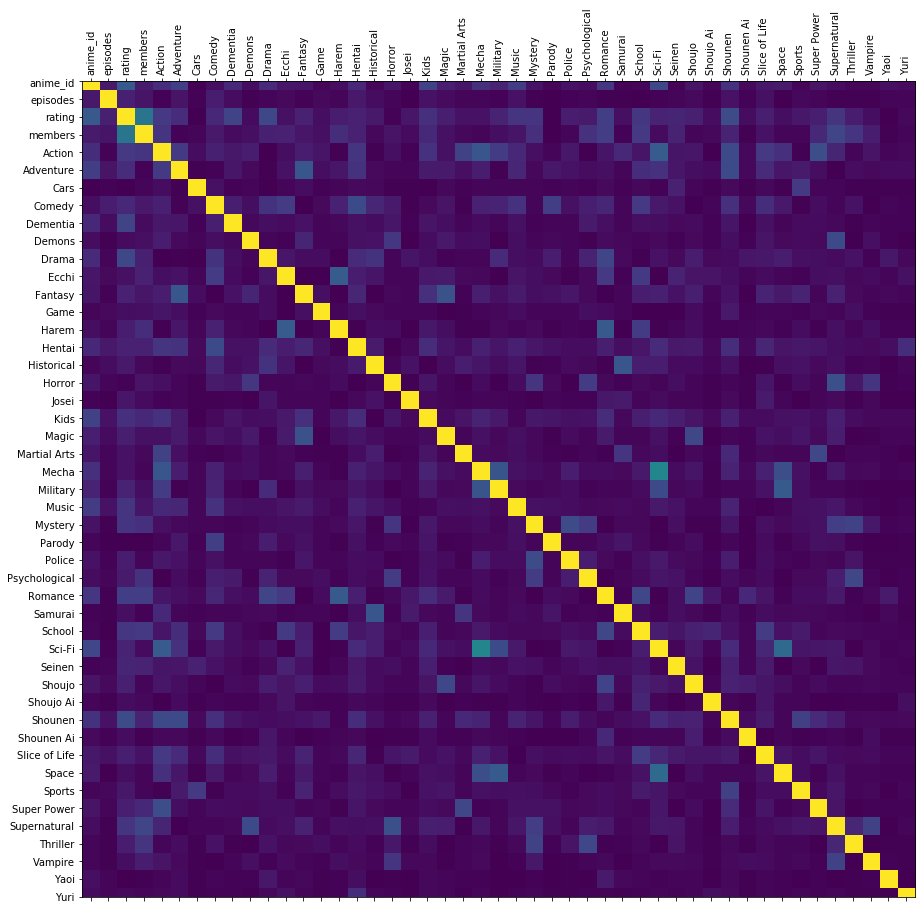

In [20]:
corr = plot_corr_matrix(df)

In [21]:
df['user_rating'] = pd.Series(np.zeros(df.shape[0]))
df.head()
df.tail()

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,user_rating
12012,9316,Toushindai My Lover: Minami tai Mecha-Minami,0.000000,0.297719,0.000196,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
12013,5543,Under World,0.000000,0.313325,0.000169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
12014,5621,Violence Gekiga David no Hoshi,0.001651,0.385354,0.000204,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
12015,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,0.000000,0.397359,0.000161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
12016,26081,Yasuji no Pornorama: Yacchimae!!,0.000000,0.454982,0.000128,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [22]:
import xml.etree.ElementTree as ET

tree = ET.parse('my_anime.xml')
root = tree.getroot()
anime_list = root.findall('anime')

for anime in anime_list:
    idx = anime.find('series_animedb_id')
    title = anime.find('series_title')
    score = anime.find('my_score')
    list_has = df['anime_id'] == float(idx.text)
    if not list_has.empty and float(score.text) != 0.0:
        df.loc[list_has, 'user_rating'] = float(score.text)
        
df.head()

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,user_rating
0,32281,Kimi no Na wa.,0.000000,0.924370,0.197867,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,10.0
1,5114,Fullmetal Alchemist: Brotherhood,0.034673,0.911164,0.782769,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
2,28977,Gintama°,0.027518,0.909964,0.112683,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
3,9253,Steins;Gate,0.012658,0.900360,0.664323,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,10.0
4,9969,Gintama&#039;,0.027518,0.899160,0.149180,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [23]:
df.corr().abs()['user_rating'][:].sort_values(ascending=False)

user_rating      1.000000
members          0.398669
rating           0.169579
School           0.124686
Romance          0.091002
Thriller         0.077548
Military         0.063860
Harem            0.061067
Ecchi            0.060635
Space            0.052915
Kids             0.050718
Seinen           0.049713
Sci-Fi           0.048391
Psychological    0.048230
Game             0.044487
Shounen          0.039878
Drama            0.038032
anime_id         0.036035
Comedy           0.035542
Historical       0.032808
Hentai           0.029237
Action           0.027912
Martial Arts     0.019517
Adventure        0.017990
Josei            0.017673
Music            0.016990
Samurai          0.014442
Demons           0.014098
Police           0.013589
Mystery          0.012704
Slice of Life    0.012673
Supernatural     0.011336
Dementia         0.010951
Cars             0.010110
Shounen Ai       0.009378
Sports           0.008986
Shoujo Ai        0.008749
Super Power      0.008040
Yuri        

In [24]:
pred_val = 'user_rating'
c = list(df.columns)
c.remove('anime_id')
c.remove('name')
c.remove(pred_val)

e = df[pred_val] != 0.0
X_train = pd.DataFrame(df[e][c])
Y_train = pd.DataFrame(df[e][pred_val])
print(X_train.shape)

e = df[pred_val] == 0.0
X = pd.DataFrame(df[e][c])
print(X.shape)

(225, 46)
(11792, 46)


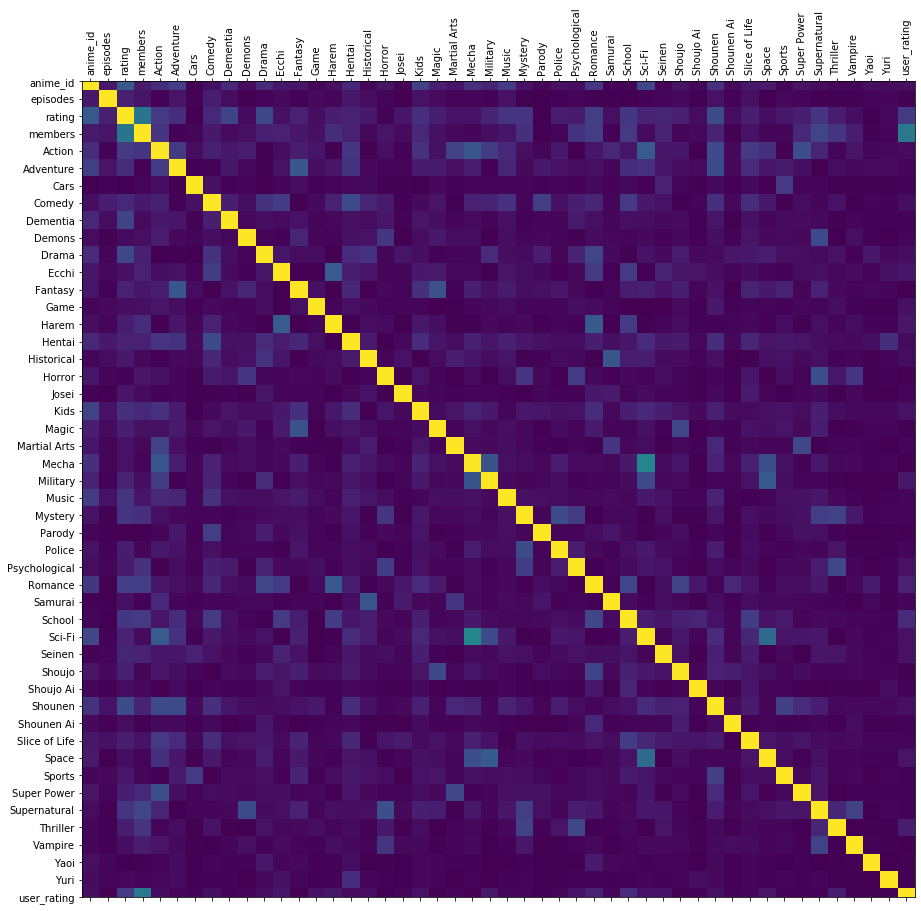

In [25]:
corr = plot_corr_matrix(df)

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
def calc_scores(model, X, Y, test=None):
    if test is not None:
        Xr = X.iloc[test,:]
        Yr = Y.iloc[test,:]
    else:
        Xr = X
        Yr = Y
    Y_pred = model.predict(Xr)
    score_r2 = model.score(Xr, Yr.values.ravel())
    score_rmse = mean_squared_error(Yr, Y_pred)
    score_abs = mean_absolute_error(Yr, Y_pred)
    return (score_r2, score_rmse, score_abs)

In [28]:
def fit_predict(model, X_train, Y_train, X, rst=21, print_size=15):
    scores_1 = []
    scores_2 = []
    scores_3 = []
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=rst)
    for i, (train, test) in enumerate(kfold.split(X_train, Y_train)):
        model.fit(X_train.iloc[train,:], Y_train.iloc[train,:].values.ravel())
        scores = calc_scores(model, X_train, Y_train, test)
        scores_1.append(scores[0])
        scores_2.append(scores[1])
        scores_3.append(scores[2])

    model.fit(X_train, Y_train.values.ravel())
    
    scores = calc_scores(model, X_train, Y_train)
    scores_1.append(scores[0])
    scores_2.append(scores[1])
    scores_3.append(scores[2])
    
    x = np.arange(0, 6, 1)
    plt.plot(x, scores_1)
    plt.plot(x, scores_2)
    plt.plot(x, scores_3)
    labels = ['R2', 'RMSE', 'MAE']
    plt.legend(labels)
    plt.show()

    # Условие по которому вы выбираете TEST выборку
    # это может быть просто df.iloc[test,:] (срез)
    e = df[pred_val] == 0.0
    
    Y = pd.DataFrame(df[e])
    Y[pred_val] = model.predict(X)
    print(Y.sort_values(by=[pred_val], ascending=False)[['name', pred_val]].head(print_size))

In [29]:
models = [
    BayesianRidge(),
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
# Classificasion methods
#     LogisticRegression(),
#     MLPClassifier(),
]

In [30]:
def solve(models, X_train, Y_train, X):
    for model in models:
        print('Model:', type(model).__name__)
        fit_predict(model, X_train, Y_train, X)
        print('\n\n\n')

Model: BayesianRidge


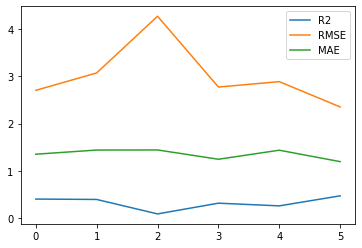

                         name  user_rating
38                    Monster     9.921192
1235               Metropolis     9.287855
493           Higashi no Eden     8.956619
365                   Paprika     8.824674
114      Sakamichi no Apollon     8.731949
832     Ima, Soko ni Iru Boku     8.625008
5295                Sanctuary     8.589349
172   Hachimitsu to Clover II     8.578789
132     Toki wo Kakeru Shoujo     8.560349
35        Howl no Ugoku Shiro     8.548517
238                Gankutsuou     8.514186
702                   Another     8.499337
981           Mousou Dairinin     8.462670
2901              Blue Gender     8.437504
2365  Giniro no Kami no Agito     8.386215




Model: LinearRegression


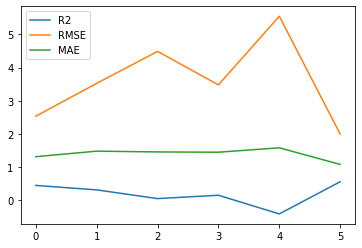

                                                   name  user_rating
38                                              Monster    12.283960
172                             Hachimitsu to Clover II    10.572720
1235                                         Metropolis    10.544546
114                                Sakamichi no Apollon    10.361105
365                                             Paprika    10.340557
325                                Hachimitsu to Clover    10.086614
596                                   Psycho-Pass Movie     9.805784
68                        Shouwa Genroku Rakugo Shinjuu     9.743177
493                                     Higashi no Eden     9.624178
91                                       Shinsekai yori     9.561978
75      Ghost in the Shell: Stand Alone Complex 2nd GIG     9.502509
137   Detective Conan Movie 06: The Phantom of Baker...     9.491569
633                                       Paradise Kiss     9.471116
601                             Va

/Users/snipghost/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


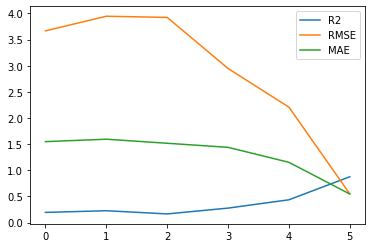

                                                   name  user_rating
18                         Ookami Kodomo no Ame to Yuki          9.6
53                  Rainbow: Nisha Rokubou no Shichinin          9.5
10                                 Clannad: After Story          9.4
21    Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...          9.2
68                        Shouwa Genroku Rakugo Shinjuu          9.2
93                                        Chihayafuru 2          9.1
45                       Kara no Kyoukai 5: Mujun Rasen          9.1
38                                              Monster          9.0
47                              Ping Pong The Animation          9.0
36                                 Fate/Zero 2nd Season          9.0
1073                            Waga Seishun no Arcadia          9.0
31                                Natsume Yuujinchou Go          8.9
51                                 Aria The Origination          8.9
34                               N

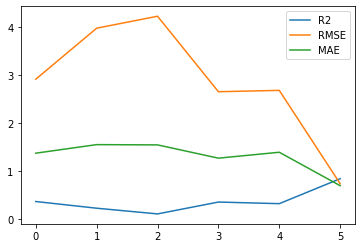

                                                   name  user_rating
45                       Kara no Kyoukai 5: Mujun Rasen     9.979689
21    Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...     9.686625
53                  Rainbow: Nisha Rokubou no Shichinin     9.407639
68                        Shouwa Genroku Rakugo Shinjuu     9.270985
38                                              Monster     9.232541
60                                   Hotarubi no Mori e     9.232013
36                                 Fate/Zero 2nd Season     9.157793
93                                        Chihayafuru 2     9.076980
77           Kara no Kyoukai 7: Satsujin Kousatsu (Kou)     8.896145
9538                Mirai ni Mukete: Bousai wo Kangaeru     8.876312
75      Ghost in the Shell: Stand Alone Complex 2nd GIG     8.801777
10                                 Clannad: After Story     8.798712
240                         Nodame Cantabile: Paris-hen     8.747536
35                                

In [31]:
solve(models, X_train, Y_train, X)

## Выводы:

Эмпирически выявлено, что лучший результат дают регрессионные модели. Задача оказалось довольно простой и предобработка данных почти не влияет на результат, для получения высокой точности предсказаний вполне достаточно было провести one-hot-encoding жанров, преобразовать их в тэги (может быть несколько на каждый сериал), и нормализовать рейтинг.

Измененение характера распределения оценок на нормальное не повлияло положительно на точность.